# Problem Set 2 CS174
---
The following problem set will focus on the lessons on Numpy and advanced Python functions. Answer the following guide questions by writing functions or code in cells that accomplish the requirements.

1. Create a function that takes in 3 parameters (integer n, integer a, integer b), and generates an nxn numpy matrix with random values from the range a to b inclusive. **2 pts.**

2. Present a count plot of the top 20 occurring words in **data/networks.txt**. Use the stopword file **data/stop.txt** to filter out the stopwords **2 pts.**

3. Using **data/ateneo.txt** and **data/tl-en.txt**, convert the phrases into straight english phrases. Leave words with no translation be. **6 pts.**

4. Using **data/tl-en.txt**, create a one-to-one English to Filipino translation of your favorite English song. Develop functions to handle pluralities, and multiple entry results. Discuss your code and please put at least 1-liner docs for the functions. **10 pts.**
       
### Bonus:
Repeat #4 but do a Filipino to English translation of your favorite Filipno song. Same specs apply. **5 pts.**

Deadline **Feb 20 11:59PM**. Submission link to be posted in Moodle. 
Submit the .ipynb file only with name <SURNAME>_<ID NUMBER>.ipynb. 
    
Sample: **"BAUTISTA_110464.ipynb"**

In [130]:
# libraries needed
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# 1

In [131]:
def generateRandMatrix(n, a, b):
    if a > b or n < 1 or not isinstance(n, int): return None 
    return np.random.randint(low=a, high=b+1, size=(n,n))

print(generateRandMatrix(5,1,5))

[[3 5 2 2 3]
 [2 2 2 5 1]
 [4 4 2 4 2]
 [4 2 5 2 3]
 [5 3 3 5 2]]


# 2

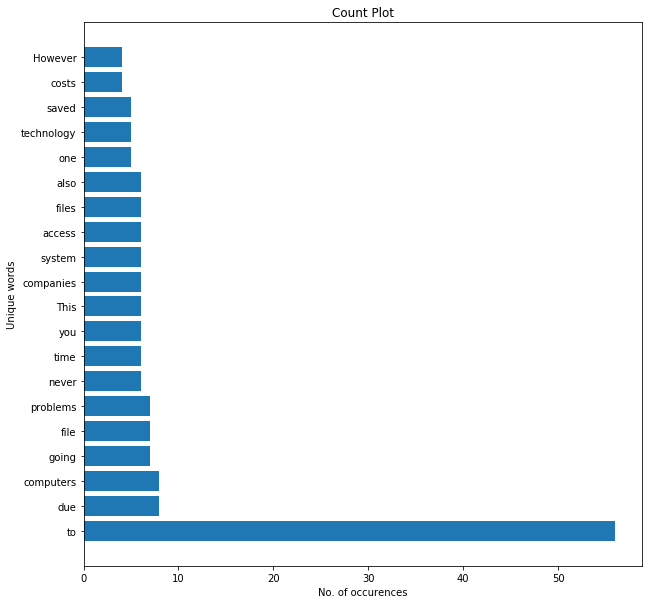

In [132]:
with open('./data/networks.txt', 'r') as f1:
    network = f1.read()
    txtList = network.replace(".", "").replace(",", "").split(" ")

    txtWordCount = {}
    for txt in txtList:
        if txt not in txtWordCount.keys():
            txtWordCount[txt] = 1
        else:
            txtWordCount[txt] += 1

    # order dict by value
    topWordCount = [k for k, v in sorted(txtWordCount.items(), key=lambda item: item[1], reverse=True)]

    with open('./data/stop.txt', 'r') as f2:
        stopWords = [line.strip()[1:-2] for line in f2]
        
        top20Words = {}
        i = 0
        while len(top20Words) < 20:
            currWord = topWordCount[i]
            if currWord not in stopWords:
                top20Words[currWord] = txtWordCount[currWord]
            i += 1
        
        plt.figure(figsize=(10, 10))
        plt.title("Count Plot")
        plt.ylabel('Unique words')
        plt.xlabel('No. of occurences')
        plt.barh(list(top20Words.keys()), list(top20Words.values()))
        plt.show()

# Util functions

In [133]:
# gets txtfile and returns list of tokenized words per line
def txtfileTo3DWordList(fileDir):
    with open(fileDir, 'r') as f:
     return [[re.sub("[^a-zA-Z]+", "", word).lower() 
                for word in sentence.rstrip().replace("-", " ").split(" ")] 
                for sentence in f.readlines()]

# translates txtfile containing translation to tag:eng (or eng:tag) dict
def getTranslationsDict(fileDir, tagToEng=True):
    with open(fileDir, 'r') as f:
        dic = {}
        for line in f.readlines():
            tlEn = line.rstrip().replace('#', '').split("\t")
            # check if translation is tagalog to english or vice versa
            k, v = tlEn if tagToEng else tlEn[::-1]
            if k in dic.keys():
                dic[k] = dic[k] + [v] if isinstance(dic[k], list) else [dic[k]] + [v]
            else:
                dic[k] = v
        return dic

# gets list of tokenized words per line and returns its translation 
def translateTxtList(origTxtList, transDict):
    translatedTxt = ""
    for line in origTxtList:
        lineTxt = ""
        for word in line:
            if word in transDict.keys():
                # get only the 1st translation if there are multiple translations
                translation = transDict[word]
                lineTxt += translation[0] + " " if isinstance(translation, list) else translation + " "
            else:
                lineTxt += word + " "
        translatedTxt += lineTxt + "\n"

    return translatedTxt

# parses the songs from azlyrics html page to list of tokenized words per line
def songTo3DWordList(
    url, 
    startLine="<!-- Usage of azlyrics.com content by any third-party lyrics provider is prohibited by our licensing agreement. Sorry about that. -->", 
    endLine="</div>"
    ):
    with urllib.request.urlopen(url) as f:
        contentBytes = f.readlines()

        startIndex = [x for x in range(len(contentBytes)) if startLine in contentBytes[x].decode("utf8")][0] + 1
        endIndex = [y for y in range(startIndex, len(contentBytes)) if endLine in contentBytes[y].decode("utf8")][0]
        lineList = []

        for i in range(startIndex, endIndex): 
            line = contentBytes[i].decode("utf8")
            if line[0] != "<":
                wordList = [re.sub(r'\W+', '', word.lower().replace("<br>", "")) for word in line.replace("-", " ").split(" ")]
                lineList.append(wordList)

        return lineList

# 3

In [134]:
ateneo = txtfileTo3DWordList('./data/ateneo.txt')
tlEn = getTranslationsDict('./data/tl-en.txt')

translatedTxt = translateTxtList(ateneo, tlEn)
print(translatedTxt)

manong to only dyan at there side 
mej hassle naman this rain 
what bro katip later g 
wait im like gonna dinner only with the fambam 
which car am i gonna take today so 
dont make stitch at fishball muna its not cuisine yet 
brother much po the neon balls 
pweds ka ba later 
ugh theres no parking space pa eh im late na nga 
its like super intense really as in extreme 
ill make farewell pa you know naman my dad is strict eh 
youre like so duration ha 
make it fast only ha 
whats wrong with being conyo ba 



# 4

In [135]:
songWordList = songTo3DWordList("https://www.azlyrics.com/lyrics/honne/day1.html")
EnTl = getTranslationsDict('./data/tl-en.txt', tagToEng=False)

translatedSong = translateTxtList(songWordList, EnTl)
print("TRANSLATED:\n" + translatedSong)

TRANSLATED:
youll laging maging my araw 1 
araw sero kapag i was walang isa 
im nothing by myself ikaw at walang isa else 
nagpapasalamat youre my araw 1 
nagpapasalamat youre my 
i nakuha lucky finding ikaw 
i nanalo malaking ang araw yan i came across ikaw 
sanhi kapag youre kay me i dont pakiramdam blue 
hindi isang araw napupunta by yan i nais hindi redo 
everybody gustong para love 
its madaling kapag ikaw try mahirap sapat 
thats kanang 
youll laging maging my araw 1 
araw sero kapag i was walang isa 
im nothing by myself ikaw at walang isa else 
nagpapasalamat youre my araw 1 
nagpapasalamat youre my araw 1 
kapag i unang nakilala ikaw it basta naramdaman kanang 
its parang i nakilala isang kopya of myself yan gabi 
i dont naniniwala nasa kapalaran bilang such 
ngunit tayo were sinadya para maging sama thats my kutob 
everybody gustong true love 
its lumabas may kung ikaw look mahirap sapat sapat sapat 
youll laging maging my araw 1 
araw sero kapag i was walang isa 
im nothing 

# Bonus

In [136]:
opmWordList = songTo3DWordList("https://www.azlyrics.com/lyrics/benben/arawaraw.html")
TlEn = getTranslationsDict('./data/tl-en.txt')

translatedOPM = translateTxtList(opmWordList, TlEn)
print("TRANSLATED:\n" + translatedOPM)

TRANSLATED:
mornings na at our hammock 
wag nang mawawala 
mornings na at our hammock 
magmamahal o mysterious 
matang magkakilala 
at first pagtagpo 
how dahan dahang 
sinuyo the heart 
kaytagal ko nang nag iisa 
andyan ka only pala 
mysterious 
pipiliin ka 
at sun sun 
mysterious 
the feelings 
at yoy clear 
higit pa at happiness 
accompanying at emotion 
all naunawaan 
at depth ng think 
mysterious 
pipiliin ka 
at sun sun 
mysterious 
the feelings 
at yoy clear 
at minsang pagbaling ng wind 
hinila patungo at mine 
na tanging ikay iibiging sincerely and intact 
payapa at hug ng your mysteries 
payapa at hug ng your 
mysterious 
pipiliin ka 
at sun sun 
mysterious 
the feelings 
at yoy clear 
mysterious 
wag nang gone 
sun sun 
mysterious 
pipiliin ka 
sun sun 

